In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from utils.conn_data import load_pickle

inputs_path = os.path.join(os.getcwd(), "data", "inputs")
outputs_path = os.path.join(os.getcwd(), "data", "outputs")

forecast_input = "futures_dataset_monthly"
memory_input = "fredmd_transf"

# load memory data and preprocess
memory_data = pd.read_csv(os.path.join(inputs_path, f'{memory_input}.csv'))

## fix dates
memory_data["date"] = pd.to_datetime(memory_data["date"])
memory_data = memory_data.set_index("date")
memory_data = memory_data.astype(float)

# fill missing values
memory_data = memory_data.interpolate(method='linear', limit_direction='forward', axis=0)
memory_data = memory_data.ffill()
memory_data = memory_data.bfill()

## compute moving average
memory_data = memory_data.rolling(window=12).mean()

## drop missing values
memory_data = memory_data.dropna()

returns = pd.read_csv(os.path.join(inputs_path, f'{forecast_input}.csv'))
returns = returns[[col for col in returns.columns if "t+1" not in col]]

## fix dates
returns["date"] = pd.to_datetime(returns["date"])
returns["date"] = returns["date"] #+ pd.DateOffset(months=1)
returns = returns.set_index("date")
memory_data = memory_data.astype(float)

## resample and match memory data dates
returns = returns.resample("MS").last().ffill()
returns = pd.merge(returns, memory_data[[memory_data.columns[0]]], left_index=True, right_index=True).drop(memory_data.columns[0], axis=1)

## drop missing values
returns = returns.dropna()

In [7]:
portfolio_methods = [
    'bl_omega=0.01',
    'bl_omega=0.1',
    'bl_omega=1',
    'bl_omega=10',
    'bl_omega=100',
]

portfolio_method = "bl_mu-shock=5" # "bl_omega=100" # next(iter(portfolio_methods))
results = load_pickle(os.path.join(outputs_path, portfolio_method, "results_lo_2.pkl"))

results.keys()

dict_keys(['regimes', 'centroids', 'regimes_probs', 'transition_probs', 'model', 'forecasts', 'args', 'views'])

In [8]:
results['forecasts']

,XU,ES,TY,FB,ZG,ZI,ZN,ZU
date,,,,,,,,
2005-05-01,0.000000,0.296098,0.000000,0.703902,0.0,0.0,0.0,0.0
2005-06-01,0.000000,0.000000,0.567568,0.432432,0.0,0.0,0.0,0.0
2005-07-01,0.000000,0.000000,0.299730,0.700270,0.0,0.0,0.0,0.0
2005-08-01,0.000000,0.000000,0.435257,0.564743,0.0,0.0,0.0,0.0
2005-09-01,0.000000,0.439857,0.000000,0.560143,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-01,0.069807,0.000000,0.000000,0.930193,0.0,0.0,0.0,0.0
2023-12-01,0.000000,0.164758,0.000000,0.835242,0.0,0.0,0.0,0.0
2024-01-01,0.000000,0.104187,0.000000,0.895813,0.0,0.0,0.0,0.0


In [9]:
results['views']

,XU,ES,TY,FB,ZG,ZI,ZN,ZU
date,,,,,,,,
2005-05-01,0.013574,0.009959,0.000000,0.000000,0.000433,0.000000,0.000000,0.000000
2005-06-01,0.008061,0.007673,0.001538,0.000250,0.013465,0.040869,0.000000,0.000000
2005-07-01,0.000000,0.005278,0.000000,0.000000,0.034547,0.075305,0.011607,0.018591
2005-08-01,0.034624,0.000000,0.001793,0.001149,0.043485,0.000000,0.081991,0.064495
2005-09-01,0.025625,0.011965,0.000000,0.000000,0.000000,0.011276,0.023086,0.040206
...,...,...,...,...,...,...,...,...
2023-11-01,0.002905,0.002284,0.004687,0.003144,0.004919,0.000000,0.000000,0.000000
2023-12-01,0.002680,0.010364,0.003651,0.001501,0.011616,0.021264,0.000000,0.008434
2024-01-01,0.000000,0.000000,0.005704,0.003842,0.004589,0.000000,0.000000,0.000000


<Axes: xlabel='date'>

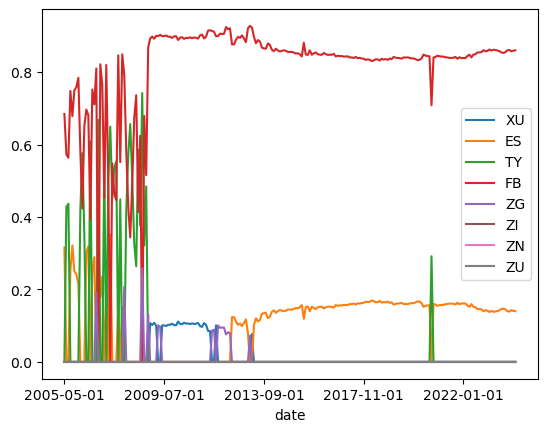

In [4]:
results['forecasts'].plot()

<Axes: xlabel='date'>

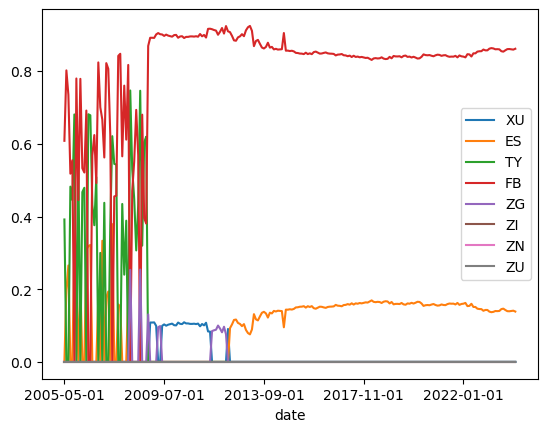

In [7]:
results['forecasts'].plot()

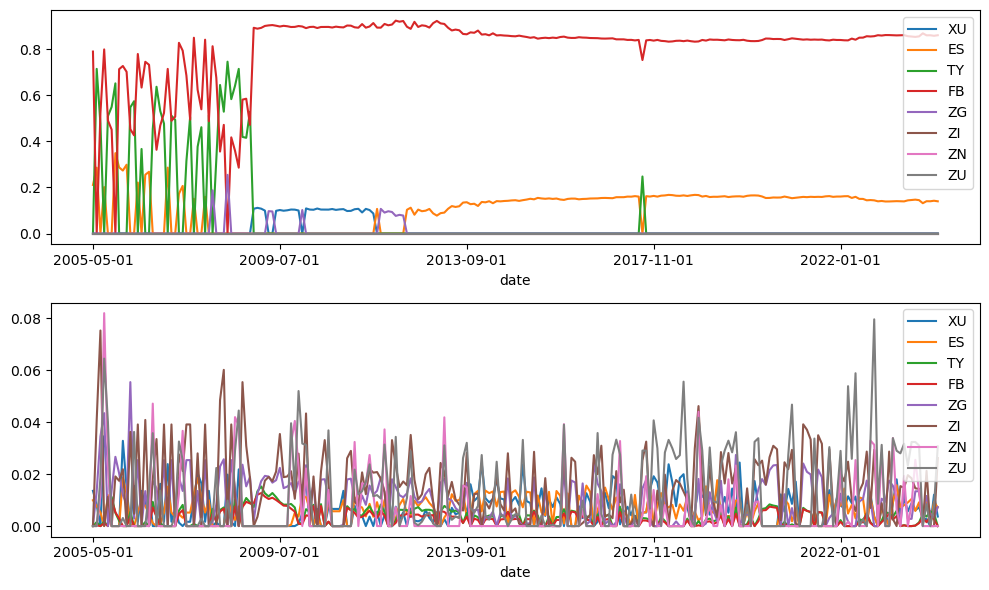

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

results['forecasts'].plot(ax=ax[0])
results['views'].plot(ax=ax[1])
plt.tight_layout()
plt.show()

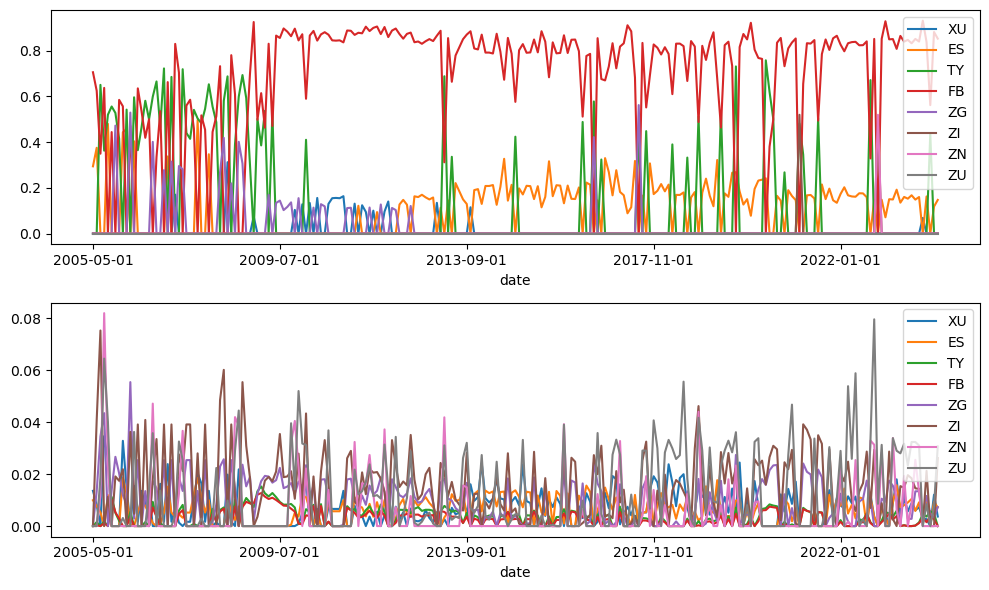

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

results['forecasts'].plot(ax=ax[0])
results['views'].plot(ax=ax[1])
plt.tight_layout()
plt.show()

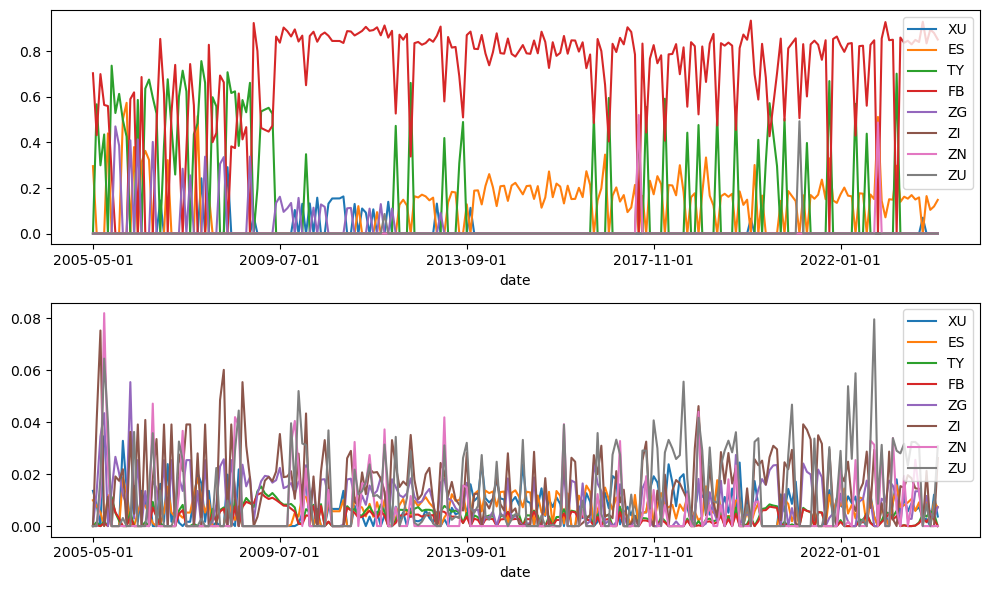

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

results['forecasts'].plot(ax=ax[0])
results['views'].plot(ax=ax[1])
plt.tight_layout()
plt.show()